# Compare ICON SEVIRI Synsat with Meteosat SEVIRI Observations

Here, we will have a look into the Synsat example data created with notebook [04-Run-Synsat-for-ICON-Data.ipynb](04-Run-Synsat-for-ICON-Data.ipynb).

A similar application is presented for ERA5 data in [03-Compare-ERA5-Synsat-to-Meteosat.ipynb](03-Compare-ERA5-Synsat-to-Meteosat.ipynb).

## Libraries 

### Setup Env and Load Libraries 

In [1]:
import os, sys
os.environ['RTTOV_PYTHON_WRAPPER'] = '/work/bb1262/tools/rttov/rttov-v13.2/wrapper'

In [2]:
import synsatipy

import synsatipy.utils.colormaps as colormaps
import synsatipy.utils.timetools as timetools


### Import Standard Libraries 

In [3]:
import xarray as xr
xr.set_options(keep_attrs=True)

import numpy as np

import pylab as plt
import cartopy.crs as ccrs

import warnings
warnings.filterwarnings("ignore")

## Data Input 

### Input Meteosat Data

In [4]:
obsfile = '/work/bb1174/data/meteosat-seviri-subregions/atlan/msevi-20200912_0000.nc'

msg = xr.open_dataset( obsfile )

t = timetools.convert_timevec( msg.time.data )

msg['time'] = t


### Input ERA5 Synsat Data 

In [5]:
synsatfile = './Data/seviri_synsat_icon_example_data.nc'

if not os.path.isfile( synsatfile ):
    raise SystemExit('Synsatfile not found')
    
else:
     icon_synsat = xr.open_dataset( synsatfile )

## Plotting

In [6]:
# dirty hack to replace nans with -99 in coordinates
msg['lon'][:] = np.where( np.isnan(msg.lon), -99, msg.lon )
msg['lat'][:] = np.where( np.isnan(msg.lat), -99, msg.lat )


In [7]:
def map_plotter(v, **spkws):
    
    map = v.plot(**spkws)

    map.axes.coastlines(color = 'white')
    map.axes.set_extent([-85, -25, 0, 45], crs=ccrs.PlateCarree())


    #fig = plt.gcf()
    #fig.set_size_inches(18, 5)

### Window Channel 

In [8]:
pkws = dict(     
    x="lon",
    y="lat",
    transform=ccrs.PlateCarree(),
    cbar_kwargs={"orientation": "horizontal", "shrink": 0.6, },#"aspect": 40},
)


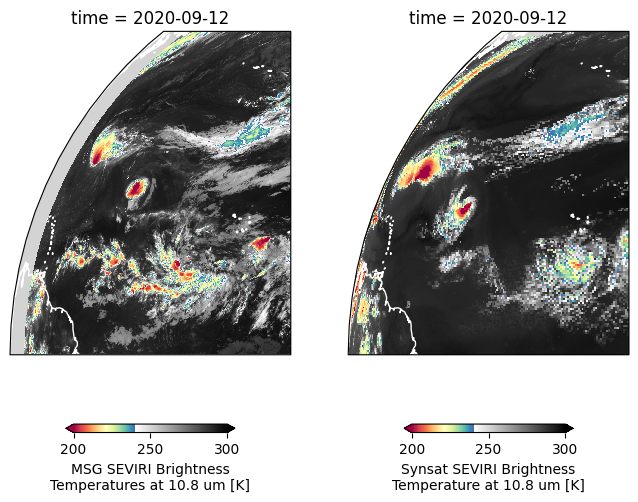

In [9]:
spkws = dict(     
    cmap=colormaps.enhanced_colormap(),
    vmin=200,
    vmax=300, **pkws
)

fig, axs = plt.subplots( ncols = 2, figsize = (8,6,), subplot_kw=dict(
        projection=ccrs.Geostationary(0), facecolor="lightgray", 
    ),)

map_plotter( msg['bt108'], ax = axs[0], **spkws ) 
map_plotter( icon_synsat['bt108'], ax = axs[1], **spkws ) 

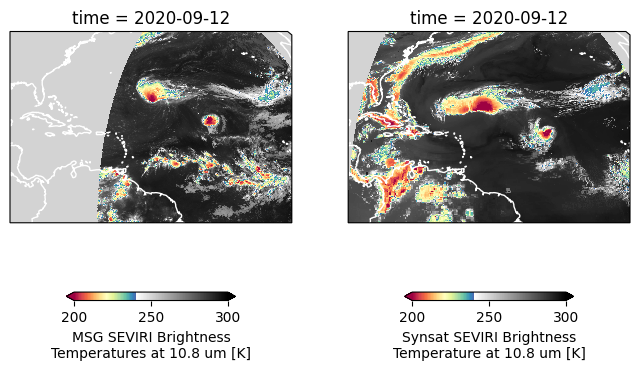

In [10]:
spkws = dict(     
    cmap=colormaps.enhanced_colormap(),
    vmin=200,
    vmax=300, **pkws
)

fig, axs = plt.subplots( ncols = 2, figsize = (8,6,), subplot_kw=dict(
        projection=ccrs.Geostationary(-60), facecolor="lightgray", 
    ),)

map_plotter( msg['bt108'], ax = axs[0], **spkws ) 
map_plotter( icon_synsat['bt108'], ax = axs[1], **spkws ) 

### Water Vapor Channels 

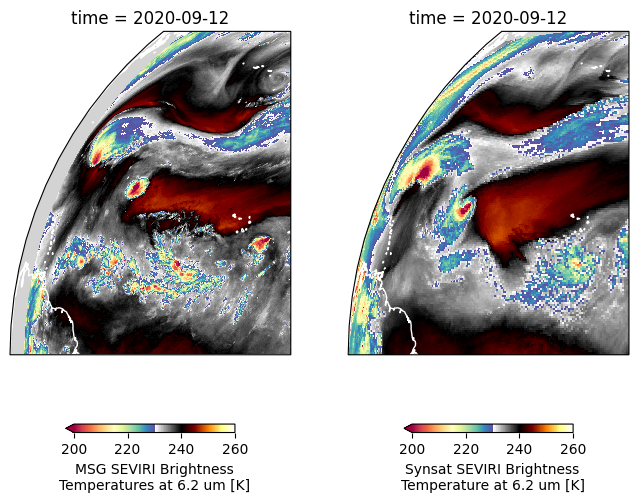

In [11]:
spkws = dict(     
    cmap=colormaps.enhanced_wv62_cmap(),
    vmin=200,
    vmax=260,
    **pkws )


fig, axs = plt.subplots( ncols = 2, figsize = (8,6,), subplot_kw=dict(
        projection=ccrs.Geostationary(0), facecolor="lightgray", 
    ),)

map_plotter( msg['bt062'], ax = axs[0], **spkws ) 
map_plotter( icon_synsat['bt062'], ax = axs[1], **spkws ) 

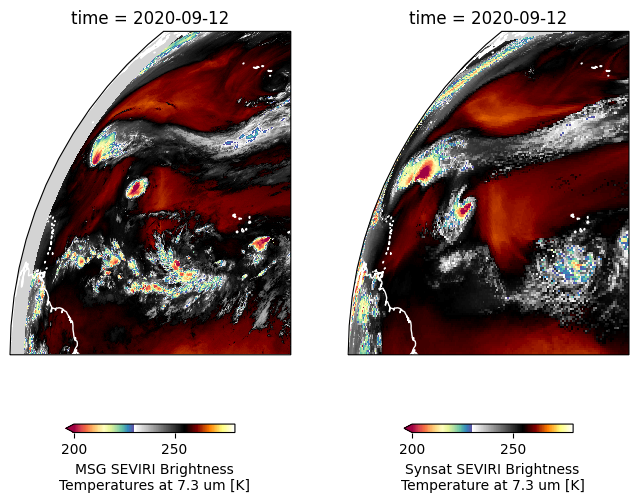

In [12]:
spkws = dict(     
    cmap=colormaps.enhanced_wv62_cmap(vmed2 = 255, vmax = 280),
    vmin=200,
    vmax=280,
    **pkws )

fig, axs = plt.subplots( ncols = 2, figsize = (8,6,), subplot_kw=dict(
        projection=ccrs.Geostationary(0), facecolor="lightgray", 
    ),)

map_plotter( msg['bt073'], ax = axs[0], **spkws ) 
map_plotter( icon_synsat['bt073'], ax = axs[1], **spkws ) 

### BT Differences 

In [13]:
for d in [msg, icon_synsat]:
    d['BTD_108_120']  = d['bt108'] - d['bt120']
    d['BTD_087_120']  = d['bt087'] - d['bt120']
    d['BTD_087_108']  = d['bt087'] - d['bt108']
    
    
    longname_suffix = d['bt108'].long_name.replace('at 10.8 um', 'Difference')
    d['BTD_108_120'].attrs['long_name'] = f'{longname_suffix} between 10.8 and 12.0 um'
    d['BTD_087_120'].attrs['long_name'] = f'{longname_suffix} between  8.7 and 12.0 um'
    d['BTD_087_108'].attrs['long_name'] = f'{longname_suffix} between  8.7 and 10.8 um'
    

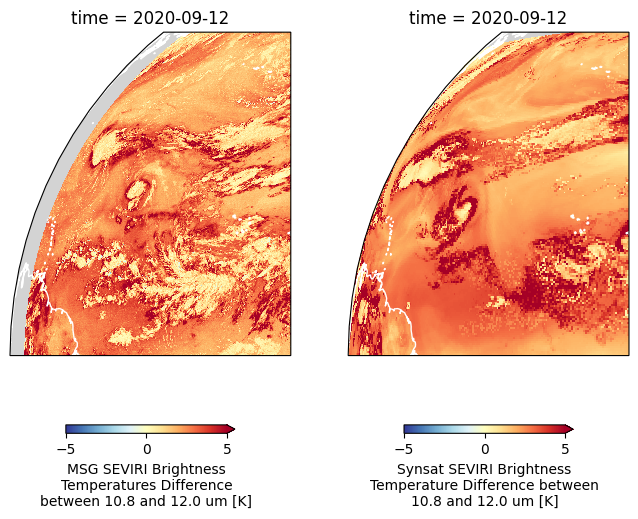

In [14]:
spkws = dict(     
    cmap=plt.cm.RdYlBu_r,
    vmin=-5,
    vmax=5,
    **pkws )

fig, axs = plt.subplots( ncols = 2, figsize = (8,6,), subplot_kw=dict(
        projection=ccrs.Geostationary(0), facecolor="lightgray", 
    ),)

map_plotter( msg['BTD_108_120'], ax = axs[0], **spkws ) 
map_plotter( icon_synsat['BTD_108_120'], ax = axs[1], **spkws ) 

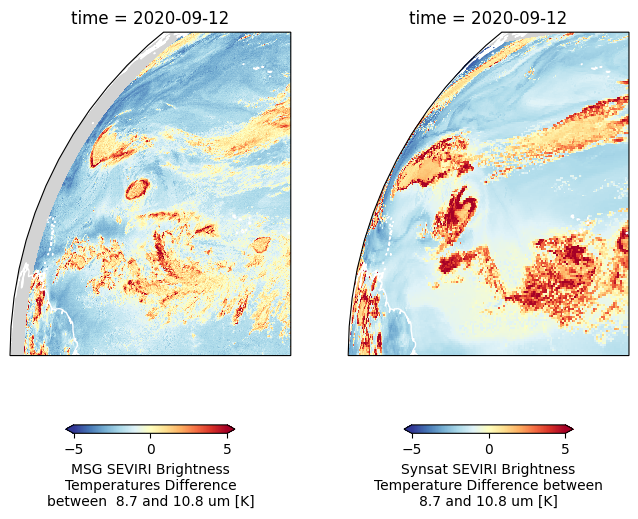

In [15]:
spkws = dict(     
    cmap=plt.cm.RdYlBu_r,
    vmin=-5,
    vmax=5,
    **pkws )

fig, axs = plt.subplots( ncols = 2, figsize = (8,6,), subplot_kw=dict(
        projection=ccrs.Geostationary(0), facecolor="lightgray", 
    ),)

map_plotter( msg['BTD_087_108'], ax = axs[0], **spkws ) 
map_plotter( icon_synsat['BTD_087_108'], ax = axs[1], **spkws ) 

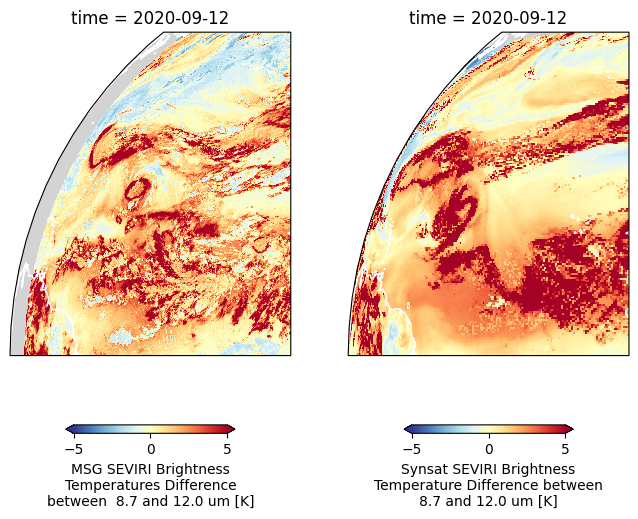

In [16]:
spkws = dict(     
    cmap=plt.cm.RdYlBu_r,
    vmin=-5,
    vmax=5,
    **pkws )

fig, axs = plt.subplots( ncols = 2, figsize = (8,6,), subplot_kw=dict(
        projection=ccrs.Geostationary(0), facecolor="lightgray", 
    ),)

map_plotter( msg['BTD_087_120'], ax = axs[0], **spkws ) 
map_plotter( icon_synsat['BTD_087_120'], ax = axs[1], **spkws ) 